# Lagrange And Newton Interpolation

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('precision', 6)

In [0]:
def linearLagrange(point1, point2):
  x0, y0 = point1
  x1, y1 = point2
  func = lambda x: (((x-x1)*y0)/(x0-x1)) + (((x-x0)*y1)/(x1-x0))
  return func
  

In [0]:
def quadLagrange(point1, point2, point3):
  x0, y0 = point1
  x1, y1 = point2
  x2, y2 = point3
  func = lambda x: (((x-x1)*(x-x2)*y0)/((x0-x1)*(x0-x2))) + (((x-x0)*(x-x2)*y1)/((x1-x0)*(x1-x2))) + (((x-x0)*(x-x1)*y2)/((x2-x0)*(x2-x1)))
  return func

In [0]:
def cubicLagrange(point1, point2, point3, point4):
  x0, y0 = point1
  x1, y1 = point2
  x2, y2 = point3
  x3, y3 = point4
  func = lambda x: (((x-x1)*(x-x2)*(x-x3)*y0)/((x0-x1)*(x0-x2)*(x0-x3))) + (((x-x0)*(x-x2)*(x-x3)*y1)/((x1-x0)*(x1-x2)*(x1-x3))) + (((x-x0)*(x-x1)*(x-x3)*y2)/((x2-x0)*(x2-x1)*(x2-x3))) + (((x-x0)*(x-x1)*(x-x2)*y3)/((x3-x0)*(x3-x1)*(x3-x2)))
  return func

In [0]:
fDD = lambda x0,x1,y0,y1:(y1 - y0)/(x1 - x0)
sDD = lambda x0,x1,x2,y0,y1,y2: (fDD(x1,x2,y1,y2) - fDD(x0,x1,y0,y1))/(x2-x0)
tDD = lambda x0,x1,x2,x3,y0,y1,y2,y3: (sDD(x1,x2,x3,y1,y2,y3) - sDD(x0,x1,x2,y0,y1,y2))/(x3-x0)

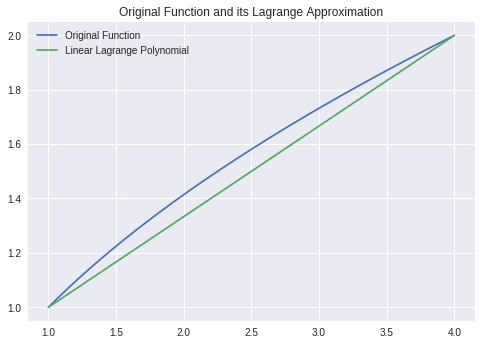

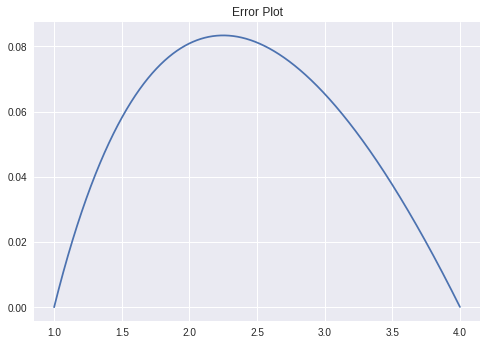

In [20]:
point1 = [1,1]
point2 = [4,2]
f1 = lambda x: x**0.5
f2 = linearLagrange(point1, point2)

r = np.arange(1,4,0.001)
plt.title("Original Function and its Lagrange Approximation")
plt.plot(r, f1(r), label='Original Function')
plt.plot(r, f2(r), label='Linear Lagrange Polynomial')
plt.legend()
plt.savefig('i1.png')
plt.show()

plt.title("Error Plot")
plt.plot(r, f1(r)-f2(r))
plt.savefig('i2.png')
plt.show()

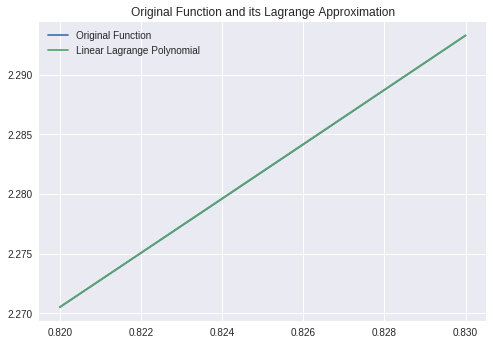

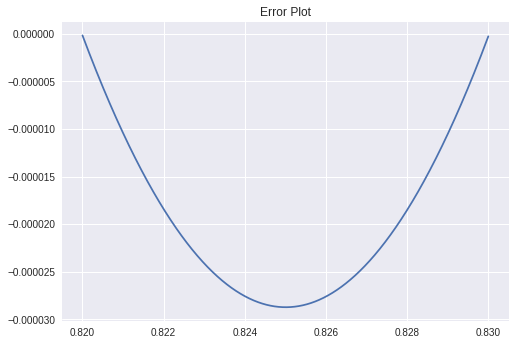

In [21]:
point1 = [0.82,2.270500]
point2 = [0.83,2.293319]
f1 = lambda x: np.exp(x)
f2 = linearLagrange(point1, point2)

r = np.arange(0.82,0.83,0.00001)
plt.title("Original Function and its Lagrange Approximation")
plt.plot(r, f1(r), label='Original Function')
plt.plot(r, f2(r), label='Linear Lagrange Polynomial')
plt.legend()
plt.savefig('i3.png')
plt.show()

plt.title("Error Plot")
plt.plot(r, f1(r)-f2(r))
plt.savefig('i4.png')
plt.show()

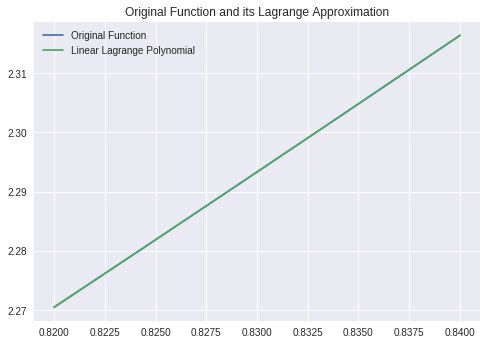

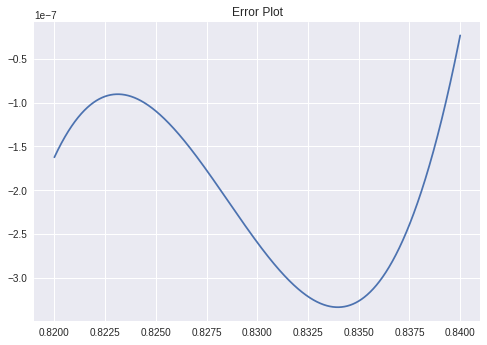

In [22]:
point1 = [0.82,2.270500]
point2 = [0.83,2.293319]
point3 = [0.84,2.316367]
f1 = lambda x: np.exp(x)
f2 = quadLagrange(point1, point2, point3)

r = np.arange(0.82,0.84,0.00001)
plt.title("Original Function and its Lagrange Approximation")
plt.plot(r, f1(r), label='Original Function')
plt.plot(r, f2(r), label='Linear Lagrange Polynomial')
plt.legend()
plt.savefig('i5.png')
plt.show()

plt.title("Error Plot")
plt.plot(r, f1(r)-f2(r))
plt.savefig('i6.png')
plt.show()

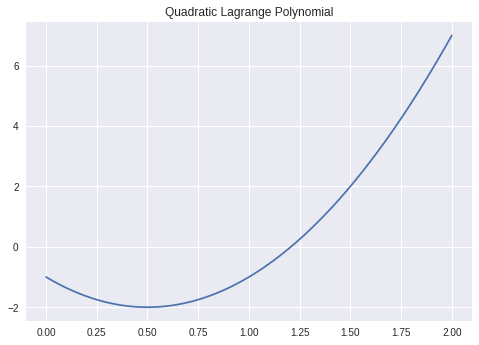

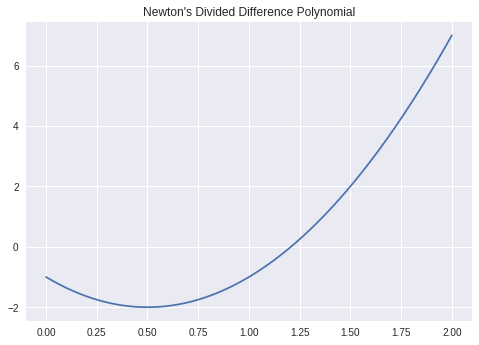

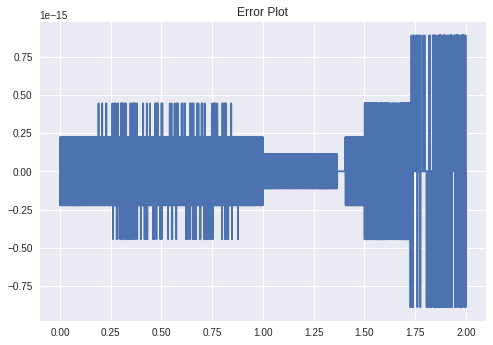

In [23]:
point1 = [0,-1]
point2 = [1,-1]
point3 = [2,7]

x0,y0 = [0,-1]
x1,y1 = [1,-1]
x2,y2 = [2,7]

f1 = quadLagrange(point1, point2, point3)

f2 = lambda x: y0 + (x-x0)*fDD(x0,x1,y0,y1) + (x-x0)*(x-x1)*sDD(x0,x1,x2,y0,y1,y2) 

r = np.arange(0,2,0.0001)
plt.title('Quadratic Lagrange Polynomial')
plt.plot(r, f1(r))
plt.savefig('i7.png')
plt.show()

plt.title("Newton's Divided Difference Polynomial")
plt.plot(r, f2(r))
plt.savefig('i8.png')
plt.show()

plt.title("Error Plot")
plt.plot(r, f2(r)-f1(r))
plt.savefig('i9.png')
plt.show()

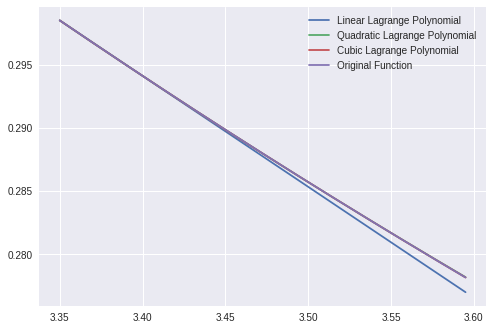

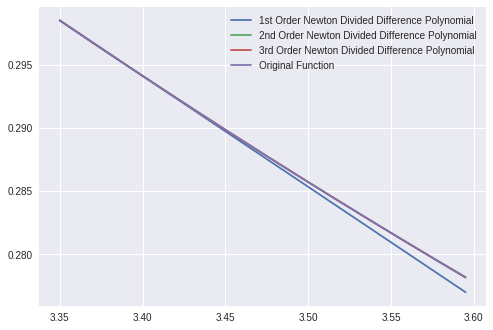

In [24]:
point1 = [3.35,0.298507]
point2 = [3.40,0.294118]
point3 = [3.50,0.285714]
point4 = [3.60,0.27778]

x0,y0 = [3.35,0.298507]
x1,y1 = [3.40,0.294118]
x2,y2 = [3.50,0.285714]
x3,y3 = [3.60,0.277778]

linear    = linearLagrange(point1, point2)
quadratic = quadLagrange(point1, point2, point3)
quadratic = quadLagrange(point1, point2, point3)
cubic     = cubicLagrange(point1,point2, point3, point4)

firstOrder  = lambda x: y0 + (x-x0)*fDD(x0,x1,y0,y1) 
secondOrder = lambda x: firstOrder(x)  + (x-x0)*(x-x1)*sDD(x0,x1,x2,y0,y1,y2)
thirdOrder  = lambda x: secondOrder(x) + (x-x0)*(x-x1)*(x-x2)*tDD(x0,x1,x2,x3,y0,y1,y2,y3)


r = np.arange(3.350,3.595,0.00001)
plt.plot(r, linear(r), label='Linear Lagrange Polynomial')
plt.plot(r, quadratic(r), label='Quadratic Lagrange Polynomial')
plt.plot(r, cubic(r), label='Cubic Lagrange Polynomial')
plt.plot(r, 1/r, label='Original Function')
plt.legend()
plt.savefig('i10.png')
plt.show()
plt.plot(r, firstOrder(r), label='1st Order Newton Divided Difference Polynomial')
plt.plot(r, secondOrder(r), label='2nd Order Newton Divided Difference Polynomial')
plt.plot(r, thirdOrder(r), label='3rd Order Newton Divided Difference Polynomial')
plt.plot(r, 1/r, label='Original Function')
plt.legend()
plt.savefig('i11.png')
plt.show()

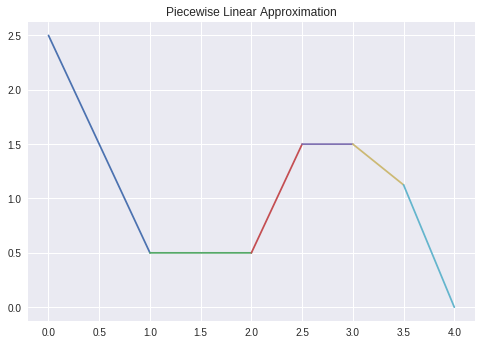

In [25]:
point1 = (0  , 2.5)
point2 = (1  , 0.5)
point3 = (2  , 0.5)
point4 = (2.5, 1.5)
point5 = (3  , 1.5)
point6 = (3.5, 1.125)
point7 = (4  , 0)

plt.title("Piecewise Linear Approximation")

r = np.arange(0,1,0.00001)
f = linearLagrange(point1, point2)
plt.plot(r, f(r))

r = np.arange(1,2,0.00001)
f = linearLagrange(point2, point3)
plt.plot(r, f(r))

r = np.arange(2,2.5,0.00001)
f = linearLagrange(point3, point4)
plt.plot(r, f(r))

r = np.arange(2.5,3,0.00001)
f = linearLagrange(point4, point5)
plt.plot(r, f(r))

r = np.arange(3,3.5,0.00001)
f = linearLagrange(point5, point6)
plt.plot(r, f(r))

r = np.arange(3.5,4,0.00001)
f = linearLagrange(point6, point7)
plt.plot(r, f(r))

plt.savefig('i12.png')
plt.show()

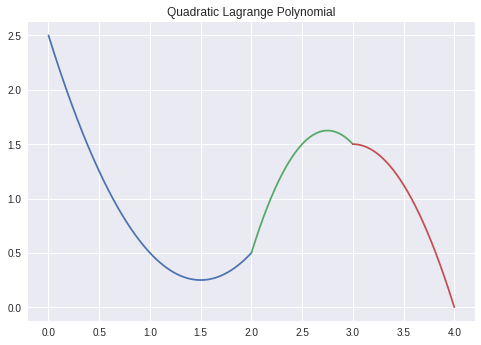

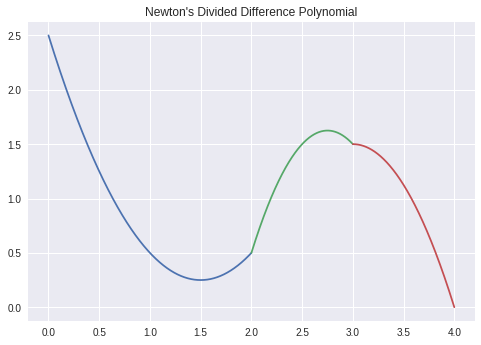

In [26]:
point1 = (0  , 2.5)
point2 = (1  , 0.5)
point3 = (2  , 0.5)
point4 = (2.5, 1.5)
point5 = (3  , 1.5)
point6 = (3.5, 1.125)
point7 = (4  , 0)

plt.title('Quadratic Lagrange Polynomial')
f11 = quadLagrange(point1, point2, point3)
r1 = np.arange(0,2,0.0001)
plt.plot(r1, f11(r1))
f12 = quadLagrange(point3, point4, point5)
r2 = np.arange(2,3,0.0001)
plt.plot(r2, f12(r2))
f13 = quadLagrange(point5, point6, point7)
r3 = np.arange(3,4,0.0001)
plt.plot(r3, f13(r3))

plt.savefig('i13.png')
plt.show()

 
plt.title("Newton's Divided Difference Polynomial")
x0,y0 = point1
x1,y1 = point2
x2,y2 = point3
f21 = lambda x: y0 + (x-x0)*fDD(x0,x1,y0,y1) + (x-x0)*(x-x1)*sDD(x0,x1,x2,y0,y1,y2)
plt.plot(r1, f21(r1))

x0,y0 = point3
x1,y1 = point4
x2,y2 = point5
f22 = lambda x: y0 + (x-x0)*fDD(x0,x1,y0,y1) + (x-x0)*(x-x1)*sDD(x0,x1,x2,y0,y1,y2)
plt.plot(r2, f22(r2))

x0,y0 = point5
x1,y1 = point6
x2,y2 = point7
f23 = lambda x: y0 + (x-x0)*fDD(x0,x1,y0,y1) + (x-x0)*(x-x1)*sDD(x0,x1,x2,y0,y1,y2)
plt.plot(r3, f23(r3))

plt.savefig('i14.png')
plt.show()

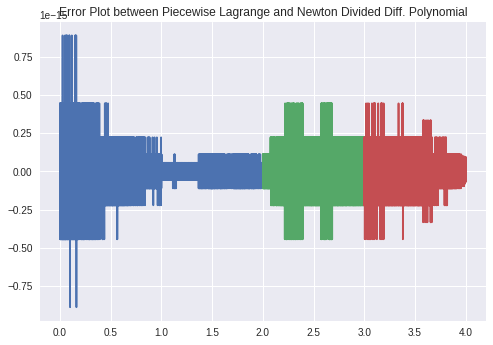

In [27]:
point1 = (0  , 2.5)
point2 = (1  , 0.5)
point3 = (2  , 0.5)
point4 = (2.5, 1.5)
point5 = (3  , 1.5)
point6 = (3.5, 1.125)
point7 = (4  , 0)

plt.title('Error Plot between Piecewise Lagrange and Newton Divided Diff. Polynomial')
x0,y0 = point1
x1,y1 = point2
x2,y2 = point3
f21 = lambda x: y0 + (x-x0)*fDD(x0,x1,y0,y1) + (x-x0)*(x-x1)*sDD(x0,x1,x2,y0,y1,y2)
f11 = quadLagrange(point1, point2, point3)
r1 = np.arange(0,2,0.0001)
plt.plot(r1, f11(r1)-f21(r1))

x0,y0 = point3
x1,y1 = point4
x2,y2 = point5
f22 = lambda x: y0 + (x-x0)*fDD(x0,x1,y0,y1) + (x-x0)*(x-x1)*sDD(x0,x1,x2,y0,y1,y2)
f12 = quadLagrange(point3, point4, point5)
r2 = np.arange(2,3,0.0001)
plt.plot(r2, f12(r2)-f22(r2))

x0,y0 = point5
x1,y1 = point6
x2,y2 = point7
f23 = lambda x: y0 + (x-x0)*fDD(x0,x1,y0,y1) + (x-x0)*(x-x1)*sDD(x0,x1,x2,y0,y1,y2)
f13 = quadLagrange(point5, point6, point7)
r3 = np.arange(3,4,0.0001)
plt.plot(r3, f13(r3)-f23(r3))

plt.savefig('i15.png')
plt.show()